In [24]:
!pip install -r requirements.txt

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df = pd.read_csv("6M-0K-99K.users.dataset.public.csv")
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [20]:
df.describe(include="all")

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913,98913.000000,98913,98913,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913
unique,NaN,1,200,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,2,2,2,2,NaN,NaN,NaN,NaN,199
top,NaN,user,France,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,mrs,False,False,False,True,NaN,NaN,NaN,NaN,fr
freq,NaN,98913,25135,51564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76121,NaN,75684,72739,94094,77386,97018,NaN,NaN,NaN,NaN,25135
mean,-6.692039e+15,NaN,NaN,NaN,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,NaN,1.773993,NaN,NaN,NaN,NaN,NaN,655.732310,3063.771870,102.125583,8.510424,NaN
std,5.330807e+18,NaN,NaN,NaN,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,NaN,0.428679,NaN,NaN,NaN,NaN,NaN,7407.430369,168.298621,5.609735,0.467863,NaN
min,-9.223101e+18,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,11.000000,2852.000000,95.070000,7.920000,NaN
25%,-4.622895e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,572.000000,2857.000000,95.230000,7.940000,NaN
50%,-1.337989e+15,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,694.000000,3196.000000,106.530000,8.880000,NaN
75%,4.616388e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,702.000000,3201.000000,106.700000,8.890000,NaN


In [21]:
df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

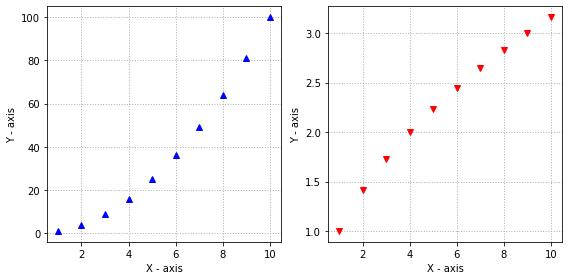

In [29]:
# creating the figure
FIG = plt.figure(figsize=(8, 4))

# populate the figure with a plot
AX0 = FIG.add_subplot(121)
AX1 = FIG.add_subplot(122)

# creating the variables to plot
X = np.linspace(1, 10, 10)
Y = np.square(X)
Y1 = np.sqrt(X)

# plot the data
AX0.plot(X, Y, color="b", ls="", marker="^", label="Square")
AX1.plot(X, Y1, color="red", ls="", marker="v", label="Square root")

# gridline
AX0.grid(linestyle=":", linewidth=1)
AX1.grid(linestyle=":", linewidth=1)

# labels
AX0.set_xlabel("X - axis")
AX0.set_ylabel("Y - axis")
AX1.set_xlabel("X - axis")
AX1.set_ylabel("Y - axis")

# tight layout
FIG.tight_layout()

# save the figure
# FIG.savefig("tight_layout.pdf")

# display the figure
plt.show()

# close the FIG object
plt.close(FIG)